In [148]:
from utils import *
from rf12demo.rf12demo import Rf12Demo
import logging, time
import logging
from networkx import minimum_spanning_tree
plogger = logging.getLogger('pymote')
plogger.setLevel(logging.ERROR+1)
#%load_ext autoreload
#%autoreload 2
%pylab inline

if "jeelink" in locals() and not jeelink.closed:
    jeelink.close()
jeelink = Rf12Demo(payload_header, payload_body, port='/dev/ttyUSB3', baudrate=57600, timeout=1)
fileHandler = logging.handlers.RotatingFileHandler('rf12demo.log')
fileHandler.setFormatter(jeelink.loghandler.formatter)
jeelink.logger.addHandler(fileHandler)

Populating the interactive namespace from numpy and matplotlib


AttributeError: 'Rf12Demo' object has no attribute 'loghandler'

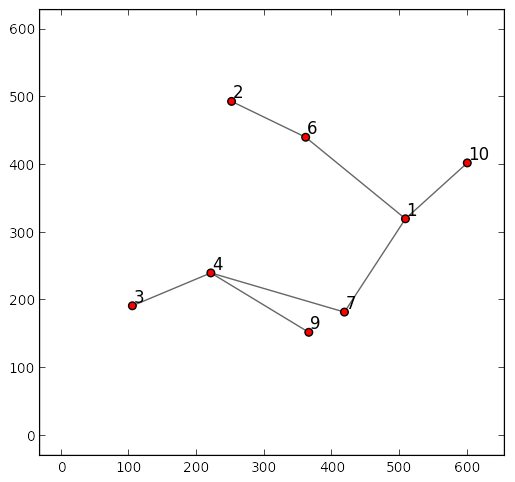

In [334]:
from pymote import NetworkGenerator

NODES = [1, 2, 3, 4, 6, 7, 9, 10]
#NODES = [4, 6, 7]
#NODES = [1, 2, 3, 4]


net_gen = NetworkGenerator(len(NODES))
net = net_gen.generate_random_network()
graf = minimum_spanning_tree(net)
net.adj = graf.adj
for i, node in enumerate(net.nodes()):
    node.id = NODES[i]
    net.labels[node] = str(node.id)
net.show()


In [322]:
for node in net.nodes():
    package = dict(("sn%d" % i, 0) for i in range(16))
    package.update(dict(map(lambda (i, n): ("sn%d" % i, n.id), enumerate(net.adj[node]))))
    print node.id, package
    jeelink.send(node.id, "SetNeighbors", package)

1 {'sn10': 0, 'sn11': 0, 'sn12': 0, 'sn13': 0, 'sn14': 0, 'sn15': 0, 'sn6': 0, 'sn7': 0, 'sn4': 0, 'sn5': 0, 'sn2': 0, 'sn3': 0, 'sn0': 2, 'sn1': 7, 'sn8': 0, 'sn9': 0}
2 {'sn10': 0, 'sn11': 0, 'sn12': 0, 'sn13': 0, 'sn14': 0, 'sn15': 0, 'sn6': 0, 'sn7': 0, 'sn4': 0, 'sn5': 0, 'sn2': 0, 'sn3': 0, 'sn0': 1, 'sn1': 6, 'sn8': 0, 'sn9': 0}
3 {'sn10': 0, 'sn11': 0, 'sn12': 0, 'sn13': 0, 'sn14': 0, 'sn15': 0, 'sn6': 0, 'sn7': 0, 'sn4': 0, 'sn5': 0, 'sn2': 0, 'sn3': 0, 'sn0': 4, 'sn1': 0, 'sn8': 0, 'sn9': 0}
4 {'sn10': 0, 'sn11': 0, 'sn12': 0, 'sn13': 0, 'sn14': 0, 'sn15': 0, 'sn6': 0, 'sn7': 0, 'sn4': 0, 'sn5': 0, 'sn2': 10, 'sn3': 3, 'sn0': 9, 'sn1': 6, 'sn8': 0, 'sn9': 0}
6 {'sn10': 0, 'sn11': 0, 'sn12': 0, 'sn13': 0, 'sn14': 0, 'sn15': 0, 'sn6': 0, 'sn7': 0, 'sn4': 0, 'sn5': 0, 'sn2': 0, 'sn3': 0, 'sn0': 4, 'sn1': 2, 'sn8': 0, 'sn9': 0}
7 {'sn10': 0, 'sn11': 0, 'sn12': 0, 'sn13': 0, 'sn14': 0, 'sn15': 0, 'sn6': 0, 'sn7': 0, 'sn4': 0, 'sn5': 0, 'sn2': 0, 'sn3': 0, 'sn0': 1, 'sn1': 0, 'sn8'

In [323]:
jeelink.send(0, "Reset")
#jeelink.send(NODES, "Reset")

In [324]:
jeelink.send(4, "Wakeup")
jeelink.send(1, "Wakeup")
jeelink.send(2, "Wakeup")

In [333]:
jeelink.send(0, "Sync")
#log = jeelink.log_received_information(1, log_package_function)